# 基于RTMPose的耳朵穴位关键点检测

## 训练RTMDet耳朵目标检测算法

In [ ]:
import os
os.chdir('mmdetection')

In [ ]:
!python tools/train.py data/rtmdet_tiny_ear.py

## 测试集评估模型精度

In [ ]:
python tools/test.py data/rtmdet_tiny_ear.py \
                      work_dirs/rtmdet_tiny_ear/epoch_200.pth

![rtmdet_result](pic/rtmdet_tiny_ear_result.png)

## 模型轻量化转换

In [ ]:
# RTMDet-tiny
!python tools/model_converters/publish_model.py \
        work_dirs/rtmdet_tiny_ear/epoch_200.pth \
        checkpoint/rtmdet_tiny_ear_epoch_200_20230604.pth

## 训练RTMPose耳朵关键点检测算法

In [ ]:
import os
os.chdir('mmpose')

In [ ]:
!python tools/train.py data/rtmpose-s-ear.py

## 测试集评估模型精度

In [ ]:
python tools/test.py data/rtmpose-s-ear.py \
                      work_dirs/rtmpose-s-ear/epoch_300.pth

![rtmpose_result](pic/rtmpose_tiny_ear_result.png)

## 关键点检测预测

#### 原始图片

![](pic/ear.jpg)

## 进入 mmpose 主目录

In [1]:
import os
os.chdir('mmpose')

## 导入工具包

In [2]:
import cv2
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

import torch

import mmcv
from mmcv import imread
import mmengine
from mmengine.registry import init_default_scope

from mmpose.apis import inference_topdown
from mmpose.apis import init_model as init_pose_estimator
from mmpose.evaluation.functional import nms
from mmpose.registry import VISUALIZERS
from mmpose.structures import merge_data_samples

from mmdet.apis import inference_detector, init_detector

In [3]:
# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


## 载入待测图像

In [4]:
img_path = 'data/ear.jpg'

In [ ]:
# Image.open(img_path)

## 准备好的模型文件

In [ ]:
## 目标检测模型

# Faster R CNN
# data/faster_r_cnn_triangle.py
# checkpoint/faster_r_cnn_triangle_epoch_50_202305120846-76d9dde3.pth

# RTMDet-Tiny
# data/rtmdet_tiny_triangle.py
# checkpoint/rtmdet_tiny_triangle_epoch_200_202305120847-3cd02a8f.pth

## 关键点检测模型

# data/rtmpose-s-triangle.py
# checkpoint/rtmpose-s-triangle-300-32642023_20230524.pth

## 构建目标检测模型

In [7]:
# RTMDet 三角板检测
detector = init_detector(
    'data/rtmdet_tiny_ear.py',
    'checkpoint/rtmdet_tiny_ear_epoch_200_20230604-0fba1521.pth',
    device=device
)

Loads checkpoint by local backend from path: checkpoint/rtmdet_tiny_ear_epoch_200_20230604-0fba1521.pth


## 构建关键点检测模型

In [9]:
pose_estimator = init_pose_estimator(
    'data/rtmpose-s-ear.py',
    'checkpoint/rtmpose-s-triangle-300_202300604.pth',
    device=device,
    cfg_options={'model': {'test_cfg': {'output_heatmaps': True}}}
)

Loads checkpoint by local backend from path: checkpoint/rtmpose-s-triangle-300_202300604.pth


## 预测-目标检测

In [10]:
init_default_scope(detector.cfg.get('default_scope', 'mmdet'))

06/04 15:45:35 - mmengine - WARNING - The current default scope "mmpose" is not "mmdet", `init_default_scope` will force set the currentdefault scope to "mmdet".


In [11]:
# 获取目标检测预测结果
detect_result = inference_detector(detector, img_path)

/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [12]:
detect_result.keys()

['gt_instances', 'ignored_instances', 'pred_instances']

In [13]:
# 预测类别
detect_result.pred_instances.labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
# 置信度
detect_result.pred_instances.scores

tensor([0.8822, 0.0736, 0.0574, 0.0545, 0.0478, 0.0403, 0.0391, 0.0329, 0.0310,
        0.0301, 0.0290, 0.0256, 0.0245, 0.0230, 0.0210, 0.0209, 0.0206, 0.0206,
        0.0202, 0.0197, 0.0190, 0.0178, 0.0177, 0.0173, 0.0169, 0.0168, 0.0164,
        0.0164, 0.0161, 0.0161, 0.0158, 0.0158, 0.0157, 0.0155, 0.0154, 0.0149,
        0.0147, 0.0145, 0.0141, 0.0139, 0.0137, 0.0137, 0.0135, 0.0134, 0.0134,
        0.0133, 0.0132, 0.0129, 0.0129, 0.0126, 0.0126, 0.0125, 0.0122, 0.0121,
        0.0120, 0.0119, 0.0117, 0.0117, 0.0115, 0.0114, 0.0113, 0.0113, 0.0113,
        0.0112, 0.0110, 0.0110, 0.0109, 0.0108, 0.0108, 0.0107, 0.0105, 0.0103,
        0.0102, 0.0102, 0.0101, 0.0101, 0.0100, 0.0100, 0.0100, 0.0098, 0.0098,
        0.0097, 0.0096, 0.0095, 0.0094, 0.0094, 0.0093, 0.0093, 0.0092, 0.0092,
        0.0092, 0.0090, 0.0089, 0.0089, 0.0089, 0.0089, 0.0088, 0.0088, 0.0087,
        0.0087, 0.0086, 0.0085, 0.0085, 0.0084, 0.0084, 0.0082, 0.0082, 0.0082,
        0.0081, 0.0080, 0.0080, 0.0079, 

In [ ]:
# 框坐标：左上角X坐标、左上角Y坐标、右下角X坐标、右下角Y坐标
# detect_result.pred_instances.bboxes

## 置信度阈值过滤，获得最终目标检测预测结果

In [15]:
# 置信度阈值
CONF_THRES = 0.5

In [16]:
pred_instance = detect_result.pred_instances.cpu().numpy()
bboxes = np.concatenate((pred_instance.bboxes, pred_instance.scores[:, None]), axis=1)
bboxes = bboxes[np.logical_and(pred_instance.labels == 0, pred_instance.scores > CONF_THRES)]
bboxes = bboxes[nms(bboxes, 0.3)][:, :4].astype('int')

In [17]:
bboxes

array([[121,   7, 319, 309]])

## 预测-关键点

In [18]:
# 获取每个 bbox 的关键点预测结果
pose_results = inference_topdown(pose_estimator, img_path, bboxes)

06/04 15:45:53 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".


/gemini/code/mmpose/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalized for '


In [19]:
len(pose_results)

1

In [20]:
# 把多个bbox的pose结果打包到一起
data_samples = merge_data_samples(pose_results)

In [21]:
data_samples.keys()

['pred_fields', 'gt_instances', '_pred_heatmaps', 'pred_instances']

## 预测结果-关键点坐标

In [22]:
keypoints = data_samples.pred_instances.keypoints.astype('int')

In [23]:
keypoints

array([[[172, 193],
        [232,  11],
        [238, 157],
        [199, 261],
        [193, 155],
        [243, 138],
        [213, 207],
        [202, 194],
        [220, 191],
        [199, 210],
        [191,  99],
        [245, 178],
        [201,  70],
        [219,  66],
        [205, 110],
        [141, 123],
        [135, 194],
        [141, 268],
        [276, 183],
        [200, 283],
        [242,  94]]])

In [24]:
keypoints.shape

(1, 21, 2)

In [25]:
# 索引为 0 的框，每个关键点的坐标
keypoints[0,:,:]

array([[172, 193],
       [232,  11],
       [238, 157],
       [199, 261],
       [193, 155],
       [243, 138],
       [213, 207],
       [202, 194],
       [220, 191],
       [199, 210],
       [191,  99],
       [245, 178],
       [201,  70],
       [219,  66],
       [205, 110],
       [141, 123],
       [135, 194],
       [141, 268],
       [276, 183],
       [200, 283],
       [242,  94]])

## 预测结果-关键点热力图

In [26]:
# 每一类关键点的预测热力图
data_samples.pred_fields.heatmaps.shape

(21, 315, 474)

In [27]:
kpt_idx = 1
heatmap = data_samples.pred_fields.heatmaps[kpt_idx,:,:]

In [28]:
heatmap.shape

(315, 474)

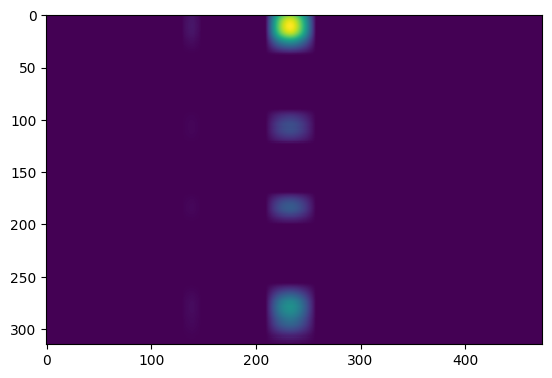

In [29]:
# 索引为 idx 的关键点，在全图上的预测热力图
plt.imshow(heatmap)
plt.show()

## OpenCV可视化

In [30]:
img_bgr = cv2.imread(img_path)

In [31]:
# 检测框的颜色
bbox_color = (150,0,0)
# 检测框的线宽
bbox_thickness = 20
# 关键点半径
kpt_radius = 70
# 连接线宽
skeleton_thickness = 30

In [32]:
# 三角板关键点检测数据集-元数据（直接从config配置文件中粘贴）
dataset_info = {
    'keypoint_info':{
        0:{'name':'angle_30','id':0,'color':[255,0,0],'type': '','swap': ''},
        1:{'name':'angle_60','id':1,'color':[0,255,0],'type': '','swap': ''},
        2:{'name':'angle_90','id':2,'color':[0,0,255],'type': '','swap': ''}
    },
    'skeleton_info': {
        0: {'link':('angle_30','angle_60'),'id': 0,'color': [100,150,200]},
        1: {'link':('angle_60','angle_90'),'id': 1,'color': [200,100,150]},
        2: {'link':('angle_90','angle_30'),'id': 2,'color': [150,120,100]}
    }
}

In [33]:
# 关键点类别和关键点ID的映射字典
label2id = {}
for each in dataset_info['keypoint_info'].items():
    label2id[each[1]['name']] = each[0]

In [ ]:
for bbox_idx, bbox in enumerate(bboxes): # 遍历每个检测框

    # 画框
    img_bgr = cv2.rectangle(img_bgr, (bbox[0], bbox[1]), (bbox[2], bbox[3]), bbox_color, bbox_thickness)
    
    # 索引为 0 的框，每个关键点的坐标
    keypoints = data_samples.pred_instances.keypoints[bbox_idx,:,:].astype('int')

    # 画连线
    for skeleton_id, skeleton in dataset_info['skeleton_info'].items(): # 遍历每一种连接
        skeleton_color = skeleton['color']
        srt_kpt_id = label2id[skeleton['link'][0]] # 起始点的类别 ID
        srt_kpt_xy = keypoints[srt_kpt_id]         # 起始点的 XY 坐标
        dst_kpt_id = label2id[skeleton['link'][1]] # 终止点的类别 ID
        dst_kpt_xy = keypoints[dst_kpt_id]         # 终止点的 XY 坐标
        img_bgr = cv2.line(img_bgr, (srt_kpt_xy[0],srt_kpt_xy[1]),(dst_kpt_xy[0],dst_kpt_xy[1]),color=skeleton_color,thickness=skeleton_thickness)
    
    # 画关键点
    for kpt_idx, kpt_xy in enumerate(keypoints): # 遍历该检测框中的每一个关键点
        kpt_color = dataset_info['keypoint_info'][kpt_idx]['color']
        img_bgr = cv2.circle(img_bgr, (kpt_xy[0], kpt_xy[1]), kpt_radius, kpt_color, -1)

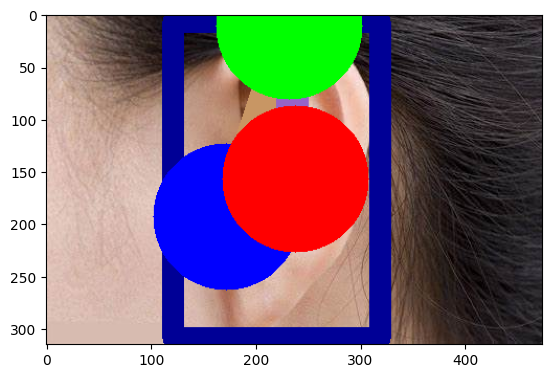

In [35]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [38]:
cv2.imwrite('output/G3_opencv.jpg', img_bgr)

True

## MMPose官方可视化工具`visualizer`

In [39]:
# 半径
pose_estimator.cfg.visualizer.radius = 50
# 线宽
pose_estimator.cfg.visualizer.line_width = 20
visualizer = VISUALIZERS.build(pose_estimator.cfg.visualizer)
# 元数据
visualizer.set_dataset_meta(pose_estimator.dataset_meta)

06/04 15:47:37 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


In [40]:
# 元数据
# pose_estimator.dataset_meta

In [42]:
img = mmcv.imread(img_path)
img = mmcv.imconvert(img, 'bgr', 'rgb')

img_output = visualizer.add_datasample(
            'result',
            img,
            data_sample=data_samples,
            draw_gt=False,
            draw_heatmap=True,
            draw_bbox=True,
            show=False,
            show_kpt_idx=True,
            wait_time=0,
            out_file='output/G3_visualizer.jpg',
            kpt_thr=0.3
)

In [43]:
img_output.shape

(630, 474, 3)

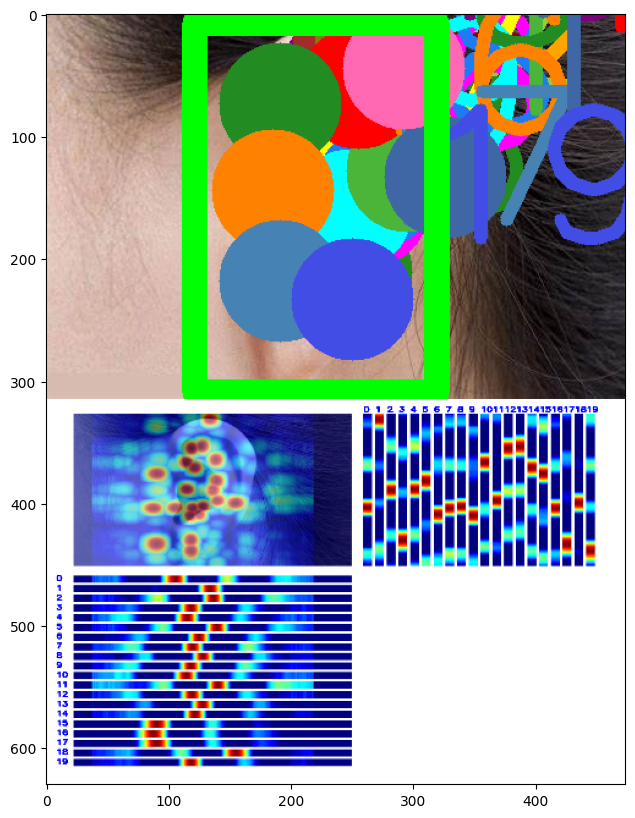

In [44]:
plt.figure(figsize=(10, 10))
plt.imshow(img_output)
plt.show()

### 视频预测

In [ ]:
!python demo/topdown_demo_with_mmdet.py \
        data/rtmdet_tiny_ear.py \
        checkpoint/rtmdet_tiny_ear_epoch_200_20230604-0fba1521.pth \
        data/rtmpose-s-ear.py \
        checkpoint/rtmpose-s-triangle-300_202300604.pth \
        --input data/demo.mp4 \
        --output-root outputs/G2_Video \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 16 \
        --thickness 10 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx